In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
df=pd.read_csv("DATA.csv")
# df.drop(["Index","trans_date_trans_time","cc_num","first","last"])
df.drop(["Index","trans_date_trans_time","cc_num","first","last",'street','city_pop', 'job', 'dob', 'trans_num', 'unix_time','merch_lat', 'merch_long'],axis=1,inplace=True)
df

,merchant,category,amt,gender,city,state,zip,lat,long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,0
...,...,...,...,...,...,...,...,...,...,...
1048570,fraud_Fadel Inc,health_fitness,77.00,F,Annapolis,MD,21405,39.0305,-76.5515,0
1048571,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,F,Hedrick,IA,52563,41.1826,-92.3097,0
1048572,"fraud_O'Connell, Botsford and Hand",home,21.27,F,Louisville,KY,40202,38.2507,-85.7476,0
1048573,fraud_Thompson-Gleason,health_fitness,9.52,F,West Sayville,NY,11796,40.7320,-73.1000,0


In [3]:
temp_mer=[]
for i in df["merchant"]:
    temp_mer.append(i[6:])
df["merchant"]=temp_mer
# print(type(i))
df

,merchant,category,amt,gender,city,state,zip,lat,long,is_fraud
0,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,0
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,0
2,Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,0
3,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,0
4,Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,0
...,...,...,...,...,...,...,...,...,...,...
1048570,Fadel Inc,health_fitness,77.00,F,Annapolis,MD,21405,39.0305,-76.5515,0
1048571,"Cremin, Hamill and Reichel",misc_pos,116.94,F,Hedrick,IA,52563,41.1826,-92.3097,0
1048572,"O'Connell, Botsford and Hand",home,21.27,F,Louisville,KY,40202,38.2507,-85.7476,0
1048573,Thompson-Gleason,health_fitness,9.52,F,West Sayville,NY,11796,40.7320,-73.1000,0


In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Apply one-hot encoding to the categorical columns
# encoded = label_encoder.fit_transform((y))
# encoded=pd.DataFrame(encoded)
# encoded
df2=pd.DataFrame()

In [5]:
for i in df.columns:
    if df[i].dtype=="object":
        encoded = label_encoder.fit_transform((df[i]))
        df[i]=encoded

df

,merchant,category,amt,gender,city,state,zip,lat,long,is_fraud
0,514,8,4.97,0,517,27,28654,36.0788,-81.1781,0
1,241,4,107.23,0,600,47,99160,48.8878,-118.2105,0
2,390,0,220.11,1,459,13,83252,42.1808,-112.2620,0
3,360,2,45.00,1,83,26,59632,46.2306,-112.1138,0
4,297,9,41.96,1,212,45,24433,38.4207,-79.4629,0
...,...,...,...,...,...,...,...,...,...,...
1048570,166,5,77.00,0,23,20,21405,39.0305,-76.5515,0
1048571,110,9,116.94,0,331,12,52563,41.1826,-92.3097,0
1048572,456,6,21.27,0,450,17,40202,38.2507,-85.7476,0
1048573,620,5,9.52,0,850,34,11796,40.7320,-73.1000,0


In [6]:
x=df.drop(["is_fraud"],axis=1)
y=df["is_fraud"]
x

,merchant,category,amt,gender,city,state,zip,lat,long
0,514,8,4.97,0,517,27,28654,36.0788,-81.1781
1,241,4,107.23,0,600,47,99160,48.8878,-118.2105
2,390,0,220.11,1,459,13,83252,42.1808,-112.2620
3,360,2,45.00,1,83,26,59632,46.2306,-112.1138
4,297,9,41.96,1,212,45,24433,38.4207,-79.4629
...,...,...,...,...,...,...,...,...,...
1048570,166,5,77.00,0,23,20,21405,39.0305,-76.5515
1048571,110,9,116.94,0,331,12,52563,41.1826,-92.3097
1048572,456,6,21.27,0,450,17,40202,38.2507,-85.7476
1048573,620,5,9.52,0,850,34,11796,40.7320,-73.1000


In [7]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
  
# transform data 
scaled_x = scaler.fit_transform(x) 
df_x=pd.DataFrame(scaled_x)
df_x

,0,1,2,3,4,5,6,7,8
0,0.850795,0.452431,-0.408305,-0.909334,0.314131,0.023050,-0.749036,-0.483482,0.657638
1,-0.507198,-0.569540,0.231013,-0.909334,0.640698,1.418646,1.872197,2.039539,-2.033949
2,0.233978,-1.591511,0.936726,1.099706,0.085927,-0.953867,1.280778,0.718445,-1.601601
3,0.084748,-1.080526,-0.158042,1.099706,-1.393460,-0.046730,0.402647,1.516144,-1.590829
4,-0.228635,0.707923,-0.177048,1.099706,-0.885905,1.279086,-0.905962,-0.022192,0.782302
...,...,...,...,...,...,...,...,...,...
1048570,-0.880273,-0.314048,0.042018,-0.909334,-1.629533,-0.465408,-1.018535,0.097922,0.993908
1048571,-1.158835,0.707923,0.291719,-0.909334,-0.417694,-1.023647,0.139840,0.521827,-0.151429
1048572,0.562284,-0.058555,-0.306399,-0.909334,0.050516,-0.674748,-0.319711,-0.055677,0.325517
1048573,1.378074,-0.314048,-0.379859,-0.909334,1.624333,0.511509,-1.375773,0.433071,1.244769


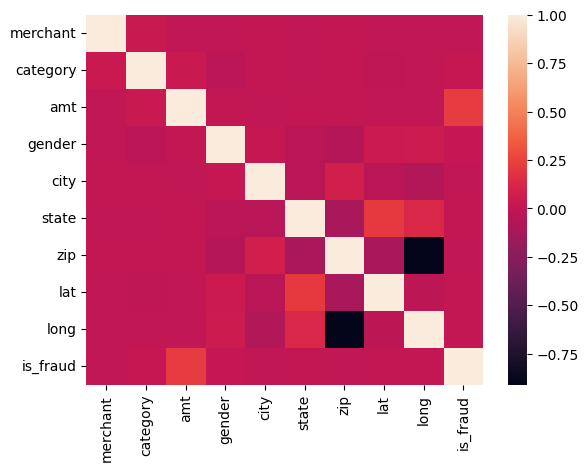

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset
dataplot = sns.heatmap(df.corr()) 
  
# displaying heatmap 
plt.show() 

In [ ]:
model=tf.keras.models.Sequential()
model.add(keras.layers.Dense(9,activation="relu",input_shape=(9,)))

model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))

model.add(keras.layers.Dense(256,activation="relu"))


model.add(keras.layers.Dense(2, activation='softmax'))


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(df_x,y,test_size=0.2,random_state=42)

In [12]:
model.fit(a_train, b_train, epochs=10,batch_size=100)